In [105]:
#Packages
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ns import ns
from scipy.stats import multivariate_normal as normal
import csv
from scipy import stats

#Constants
G = 6.674e-8 #Gravitational constant cgs
c = 2.998e10 #speed of light cm/s
Msun = 1.988e33 #in grams for reading out in terms of solar masses
rhonuc = 2.7e14 #nuclear density g/cm^3

Processed 0 lines.
Processed 1 lines.
Processed 2 lines.
Processed 3 lines.
Processed 4 lines.
Processed 5 lines.
Processed 6 lines.
Processed 7 lines.
Processed 8 lines.
Processed 9 lines.
Processed 10 lines.
Processed 11 lines.
Processed 12 lines.
Processed 13 lines.
Processed 14 lines.
Processed 15 lines.
Processed 16 lines.
Processed 17 lines.
Processed 18 lines.
Processed 19 lines.
Processed 20 lines.
Processed 21 lines.
Processed 22 lines.
Processed 23 lines.
Processed 24 lines.
Processed 25 lines.
Processed 26 lines.
Processed 27 lines.
Processed 28 lines.
Processed 29 lines.
Processed 30 lines.
Processed 31 lines.
Processed 32 lines.
Processed 33 lines.
Processed 34 lines.
Processed 35 lines.
Processed 36 lines.
Processed 37 lines.
Processed 38 lines.
Processed 39 lines.
Processed 40 lines.
Processed 41 lines.
Processed 42 lines.
Processed 43 lines.
Processed 44 lines.
Processed 45 lines.
Processed 46 lines.
Processed 47 lines.
Processed 48 lines.
Processed 49 lines.
Processed 

Processed 1914 lines.
Processed 1915 lines.
Processed 1916 lines.
Processed 1917 lines.
Processed 1918 lines.
Processed 1919 lines.
Processed 1920 lines.
Processed 1921 lines.
Processed 1922 lines.
Processed 1923 lines.
Processed 1924 lines.
Processed 1925 lines.
Processed 1926 lines.
Processed 1927 lines.
Processed 1928 lines.
Processed 1929 lines.
Processed 1930 lines.
Processed 1931 lines.
Processed 1932 lines.
Processed 1933 lines.
Processed 1934 lines.
Processed 1935 lines.
Processed 1936 lines.
Processed 1937 lines.
Processed 1938 lines.
Processed 1939 lines.
Processed 1940 lines.
Processed 1941 lines.
Processed 1942 lines.
Processed 1943 lines.
Processed 1944 lines.
Processed 1945 lines.
Processed 1946 lines.
Processed 1947 lines.
Processed 1948 lines.
Processed 1949 lines.
Processed 1950 lines.
Processed 1951 lines.
Processed 1952 lines.
Processed 1953 lines.
Processed 1954 lines.
Processed 1955 lines.
Processed 1956 lines.
Processed 1957 lines.
Processed 1958 lines.
Processed 

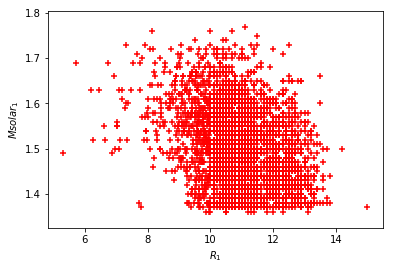

'def distr(R,M): # 2D Gaussian centered on (Mobs, Robs)\n    \n    return normal.pdf([R,M],mean=[Robs,Mavg1],cov=[[Rerr**2,0],[0,Merr1**2]])\n\ndef L1(R1 = [],M1 = []): # Likelihood as a function of (M,R) for plotting purposes\n    \n    Lmat1 = np.zeros((len(R1),len(M1)))\n    \n    for i in range(len(R1)):\n        \n        for j in range(len(M1)):\n            \n            Lmat1[i,j] = distr(R1[i],M1[j])\n    \n    return Lmat1'

In [102]:
#Neutron Star 1
Mupper1 = 1.89 # SET OBSERVED MASS [Msun] AND ERROR BARS HERE
Mlower1 = 1.36
Mavg1 = 1.63
Merr1 = 0.265

Robs = 11.9 # SET OBSERVED RADIUS [km] AND ERROR BARS HERE
Rerr = 1.4

R = []
M = []

with open('EoS-insensitive_posterior_samples.txt') as csv_file: #Pulls Mass/Radius data from CSV file
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0: #Header line gets ignored
            print(f'Processed {line_count} lines.')
            line_count = line_count + 1
        elif line_count == 2921: #last line in file; makes sure it doesnt keep appending empty values and plots figure
            plt.scatter(R,M,marker='+',c='red')
            plt.xlabel('$R_1$')
            plt.ylabel('$Msolar_1$')
            plt.savefig('star1mr.png')
            plt.show()
            R = np.asarray(R)
            M = np.asarray(M)
            break
        else:  #creates a radius and mass array for use in calculating the kde
            R.append(float(row[4]))
            M.append(float(row[0]))
            print(f'Processed {line_count} lines.')
            line_count = line_count + 1

xmin, xmax = min(R), max(R) #range for kde
ymin, ymax = min(M), max(M)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([R, M])
kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape) #makes it plottable

def distr(R,M): # 2D Gaussian centered on (Mobs, Robs) for evidence; Couldn't figure out how to make the better distribution work with the evidences :/
    
    return normal.pdf([R,M],mean=[Robs,Mavg1],cov=[[Rerr**2,0],[0,Merr1**2]])

In [91]:
#EoS information and initialization
eosnames = ["alf1","alf2","alf3","H1","H2","H3","H4","H5","H6","H7","gs1","gs2","pal6","wff1","wff2","wff3"] # SET EQUATIONS OF STATE HERE
rhocs = np.linspace(1.,5.,10) # SET CENTRAL MASS DENSITIES HERE

eospath = "./" # path to EoS data files
stp = 1e-4 # starting step for numerical integration
pts = 5e3 # number of points at which to evaluate numerical integration
tol = 1e-6 # tolerance for surface finding algorithm

In [92]:
#EoS Integrater
Mlist = np.zeros((len(eosnames),len(rhocs)))
Rlist = np.zeros((len(eosnames),len(rhocs)))
rslist = []
muslist = []
mslist = []
lengths = [0]

RM = []

i = 0
for eosname in eosnames:
    j = 0
    print('Integrating {0}'.format(eosname))
    for rhoc in rhocs:
        [props, rs, mus, ms] = ns(eosname,rhoc,pts,eospath,stp,tol)
        [Rlist[i,j], Mlist[i,j]] = props
        lengths = np.append(lengths,len(rs))
        rslist = np.append(rslist,rs)
        muslist = np.append(muslist,mus)
        mslist = np.append(mslist,ms)

        j = j+1
    
    RMfunc = interp1d(Mlist[i],Rlist[i],kind='linear',bounds_error=False,fill_value=0.)
    RM = np.append(RM,RMfunc)
    i = i+1

Integrating alf1


C:\Users\ngarr\Documents\UChicago\SecondYear\Fall2018\SeminarClass\Project\ns.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  return -(mu+p(mu))*(m+4.*np.pi*r**3*p(mu))/(dpdmu(mu)*r**2*(1.-2.*m/r)) # note that we are using G=c=1 units in this code


Integrating alf2


C:\Users\ngarr\Documents\UChicago\SecondYear\Fall2018\SeminarClass\Project\ns.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return -(mu+p(mu))*(m+4.*np.pi*r**3*p(mu))/(dpdmu(mu)*r**2*(1.-2.*m/r)) # note that we are using G=c=1 units in this code
C:\Users\ngarr\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Integrating alf3
Integrating H1
Integrating H2
Integrating H3
Integrating H4
Integrating H5
Integrating H6
Integrating H7
Integrating gs1


C:\Users\ngarr\Documents\UChicago\SecondYear\Fall2018\SeminarClass\Project\ns.py:30: RuntimeWarning: invalid value encountered in true_divide
  dpdmumuintp = interp1d(mudat,np.gradient(pdat)/np.gradient(mudat),kind='linear',bounds_error=False,fill_value=0.)


Integrating gs2
Integrating pal6
Integrating wff1
Integrating wff2
Integrating wff3


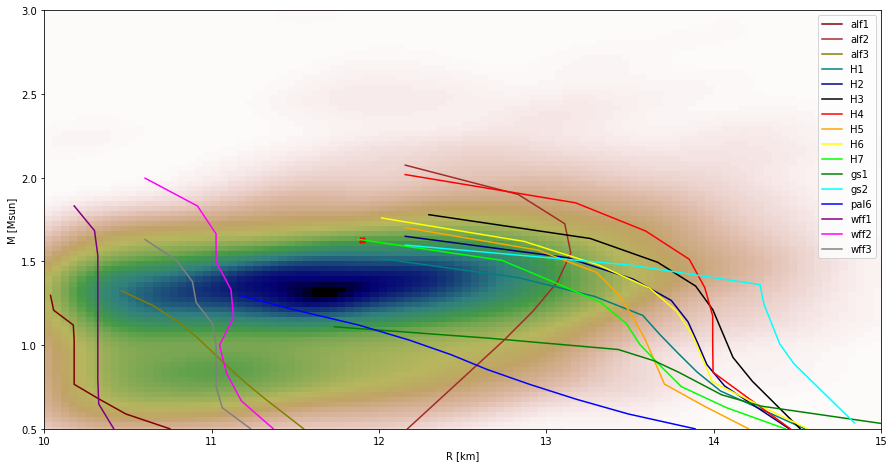

In [93]:
#star 1
colors = ['maroon','brown','olive','teal','navy','black','red','orange','yellow','lime','green','cyan','blue','purple','magenta','grey','lavender']

plt.figure(1,(15,10)) # plot interpolated M(R)
MLs = np.linspace(0.,3.0,100)
RLs = np.linspace(10.,16.,100)
plt.imshow(Z, cmap=plt.cm.gist_earth_r,extent=[10, 15, 0, 3])
plt.scatter(Robs,Mavg1,marker='X',c='r')
for i in np.arange(len(eosnames)):
    Ms = np.linspace(max(0.5,min(Mlist[i])),max(Mlist[i]),10)
    #plt.scatter(Rlist[i],Mlist[i],c=colors[i],marker='.',label=eosnames[i])
    plt.plot(RM[i](Ms),Ms,c=colors[i],label=eosnames[i])
plt.ylabel('M [Msun]')
plt.xlabel('R [km]')
plt.ylim(0.5,3.)
plt.xlim(10.,15.)
plt.legend()
plt.savefig('plotstar1.png')
plt.show()

In [104]:
#Bayesian Evidence Star
evidence0 = lambda M: distr(RM[0](M),M)
evidence1 = lambda M: distr(RM[1](M),M)
evidence2 = lambda M: distr(RM[2](M),M)
evidence3 = lambda M: distr(RM[3](M),M)
evidence4 = lambda M: distr(RM[4](M),M)
evidence5 = lambda M: distr(RM[5](M),M)
evidence6 = lambda M: distr(RM[6](M),M)
evidence7 = lambda M: distr(RM[7](M),M)
evidence8 = lambda M: distr(RM[8](M),M)
evidence9 = lambda M: distr(RM[9](M),M)
evidence10 = lambda M: distr(RM[10](M),M)
evidence11 = lambda M: distr(RM[11](M),M)
evidence12 = lambda M: distr(RM[12](M),M)
evidence13 = lambda M: distr(RM[13](M),M)
evidence14 = lambda M: distr(RM[14](M),M)
evidence15 = lambda M: distr(RM[15](M),M)

e0, err0 = quad(evidence0,0.5,3)
e1, err1 = quad(evidence1,0.5,3.)
e2, err2 = quad(evidence2,0.5,3.)
e3, err3 = quad(evidence3,0.5,3.)
e4, err4 = quad(evidence4,0.5,3.)
e5, err5 = quad(evidence5,0.5,3.)
e6, err6 = quad(evidence6,0.5,3.)
e7, err7 = quad(evidence7,0.5,3.)
e8, err8 = quad(evidence8,0.5,3.)
e9, err9 = quad(evidence9,0.5,3.)
e10, err10 = quad(evidence10,0.5,3.)
e11, err11 = quad(evidence11,0.5,3.)
e12, err12 = quad(evidence12,0.5,3.)
e13, err13 = quad(evidence13,0.5,3.)
e14, err14 = quad(evidence14,0.5,3.)
e15, err15 = quad(evidence15,0.5,3.)

eb = np.array([e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15])
np.savetxt('star1evidence.txt', eb, delimiter=',')

bb = np.array([np.log10(e0/e9),np.log10(e1/e9),np.log10(e2/e9),np.log10(e3/e9),np.log10(e4/e9),np.log10(e5/e9),np.log10(e7/e9),np.log10(e8/e9),np.log10(e6/e9),np.log10(e10/e9),np.log10(e11/e9),np.log10(e12/e9),np.log10(e13/e9),np.log10(e14/e9),np.log10(e15/e9)])
np.savetxt('star1factors.dat', bb, delimiter=',')

print('The Bayesian evidences for each EoS are E0={0}, E1={1}, E2={2},E3={3}, E4={4}, E5={5},E6={6}, E7={7}, E8={8},E9={9}, E10={10}, E11={11},E12={12}, E13={13}, E14={14},E15={15}'.format(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15))

print('The log evidence ratios (Bayes factors) are B06={0}, B16={1}, B26={2}, B36={3}, B46={4}, B56={5}, B76={6}, B86={7}, B96={8}, B106={9}, B116={10}, B126={11}, B136={12}, B146={13}, B156={14}'.format(np.log10(e0/e9),np.log10(e1/e9),np.log10(e2/e9),np.log10(e3/e9),np.log10(e4/e9),np.log10(e5/e9),np.log10(e7/e9),np.log10(e8/e9),np.log10(e6/e9),np.log10(e10/e9),np.log10(e11/e9),np.log10(e12/e9),np.log10(e13/e9),np.log10(e14/e9),np.log10(e15/e9)))

C:\Users\ngarr\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\ngarr\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


The Bayesian evidences for each EoS are E0=0.012977267949282075, E1=0.19679224611009502, E2=0.024432915393623075,E3=0.06921790978621802, E4=0.09225332904196039, E5=0.10714741671697697,E6=0.12749018329794423, E7=0.11967205355593853, E8=0.13129944564762797,E9=0.11097491286824507, E10=0.005378609286445738, E11=0.060025854696060525,E12=0.028027442042668594, E13=0.11520409558796955, E14=0.21247609634725537,E15=0.10612955853429935
The log evidence ratios (Bayes factors) are B06=-0.9320415408515264, B16=0.24878316991005178, B26=-0.6572495215952686, B36=-0.20500633220083692, B46=-0.08024276570239906, B56=-0.015243107880922067, B76=0.03276793081487249, B86=0.0730380797698293, B96=0.06025193281352706, B106=-1.3145548153540443, B116=-0.26688646010721456, B126=-0.5976413495377481, B136=0.016243106128995856, B146=0.2820852661053488, B156=-0.019388455007471852


In [118]:
def dist(M):
    xmin, xmax = min(R), max(R) #range for kde
    ymin, ymax = min(M), max(M)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([R, M])
    kernel = stats.gaussian_kde(values)
    return kernel(values)

evidence = lambda M: dist(M)
e, err = quad(evidence, 0.5, 3)

TypeError: 'float' object is not subscriptable

<function <lambda> at 0x0000015F59959B70>
